In [3]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r'C:\Users\ananyya srivastava\Desktop\SoilS.csv')

In [5]:
df.head()

,District,Block,Panchayath,SampleCode,FarmerName,ContactAddress,f_dateofsampling,f_sex,f_surveyno,f_latitude,...,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn,Zinc_Method,Copper_Method,Iron_Method,Manganese_Method
0,Thrissur,Anthikkad Block,Manaloor,TCR/TRS/MNL/215/3/182896,sunil.K.A,kunnath house\r\n Manaloor post,3/26/2011,male,215/3,0,...,34.40,8.09,0.59,48.20,9.45,21.32,HCl,HCl,HCl,HCl
1,Kottayam,Erattupetta Block,Melukavu,KTM/MNC/MLK/729/11/182897,T.M. Joseph,Valluvadikkal House\r\nKizhakkanmattom\r\n,3/18/2011,male,729/11,0,...,25.00,3.77,1.68,23.60,1.63,14.00,HCl,HCl,HCl,HCl
2,Kollam,Sasthamcotta Block,Kunnathur,KLM/KNT/KNT/60/6/182898,SUMANGALAAMMA,THENGANAYYATHU\r\nIVERKALA PADI NORTH\r\nPUTHA...,4/4/2011,female,60/6,0,...,0.77,6.89,0.53,2.99,0.83,6.80,HCl,HCl,HCl,HCl
3,Kottayam,Erattupetta Block,Melukavu,KTM/MNC/MLK/669/2/182899,P.V. Georgekutty,Paikadayil House\r\nKonnippadu P.O\r\n,3/18/2011,male,669/2,0,...,25.00,2.43,1.82,18.30,1.66,4.20,HCl,HCl,HCl,HCl
4,Thrissur,Anthikkad Block,Manaloor,TCR/TRS/MNL/918/1/182900,Abhilash,Thottupura house\r\n Manaloor post,3/26/2011,male,918/1,0,...,35.60,13.89,1.66,92.90,9.90,21.31,HCl,HCl,HCl,HCl


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
District            2000 non-null object
Block               2000 non-null object
Panchayath          2000 non-null object
SampleCode          2000 non-null object
FarmerName          2000 non-null object
ContactAddress      2000 non-null object
f_dateofsampling    2000 non-null object
f_sex               2000 non-null object
f_surveyno          2000 non-null object
f_latitude          2000 non-null int64
f_longitude         2000 non-null int64
f_ownership         2000 non-null object
f_ownername         0 non-null float64
f_panchayat         2000 non-null int64
f_pincode           546 non-null float64
f_district          2000 non-null int64
f_taluk             2000 non-null int64
f_block             2000 non-null int64
f_mob_no            387 non-null float64
SoilType            2000 non-null object
crop1               2000 non-null object
crop2               2000 non-null object

In [7]:
df[['f_ownership','f_ownername','f_panchayat','f_pincode','f_district','f_taluk','f_block','f_mob_no']].head()

,f_ownership,f_ownername,f_panchayat,f_pincode,f_district,f_taluk,f_block,f_mob_no
0,ownland,NaN,524,680617.0,8,41,111,NaN
1,ownland,NaN,294,NaN,5,24,63,NaN
2,ownland,NaN,143,NaN,2,8,29,NaN
3,ownland,NaN,294,NaN,5,24,63,NaN
4,ownland,NaN,524,680617.0,8,41,111,NaN


In [8]:

soil_col=['Soil_pH','Soil_ec','Soil_OrganicC','Soil_P','Soil_k','Soil_Ca','Soil_Mg','Soil_s',
          'Soil_Zn','Soil_b','Soil_Fe','Soil_Cu','Soil_Mn']

In [9]:
methods_col=['Zinc_Method','Copper_Method','Iron_Method','Manganese_Method']

In [10]:
f_col=['FarmerName','ContactAddress','f_dateofsampling','f_sex', 'f_surveyno','f_latitude', 'f_longitude', 'f_ownership', 'f_ownername',
       'f_panchayat', 'f_pincode', 'f_district', 'f_taluk', 'f_block','f_mob_no',]

In [11]:
df[soil_col].mean()

Soil_pH            5.573874
Soil_ec            0.227181
Soil_OrganicC      1.206468
Soil_P            75.865930
Soil_k           209.237950
Soil_Ca          373.570914
Soil_Mg           51.942797
Soil_s            11.555962
Soil_Zn            5.680801
Soil_b             0.577789
Soil_Fe           68.614304
Soil_Cu            3.673857
Soil_Mn           23.975925
dtype: float64

In [12]:
df.describe()

,f_latitude,f_longitude,f_ownername,f_panchayat,f_pincode,f_district,f_taluk,f_block,f_mob_no,Soil_pH,...,Soil_P,Soil_k,Soil_Ca,Soil_Mg,Soil_s,Soil_Zn,Soil_b,Soil_Fe,Soil_Cu,Soil_Mn
count,2000.0,2000.0,0.0,2000.000000,546.000000,2000.000000,2000.000000,2000.000000,3.870000e+02,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.0,0.0,NaN,413.121000,681422.868132,5.958500,27.595000,84.964000,9.395787e+09,5.573874,...,75.86593,209.237950,373.570914,51.942797,11.555962,5.680801,0.577789,68.614304,3.673857,23.975925
std,0.0,0.0,NaN,283.888768,29355.254943,3.620958,17.942518,57.293664,1.312579e+09,0.673939,...,57.40095,202.927122,379.162491,105.679611,11.653144,6.835201,0.916663,128.355449,26.856054,18.705390
min,0.0,0.0,NaN,98.000000,6.000000,2.000000,7.000000,20.000000,2.410170e+05,0.600000,...,0.00000,0.700000,0.410000,0.200000,0.060000,0.010000,0.000000,0.180000,0.010000,0.100000
25%,0.0,0.0,NaN,152.000000,680734.000000,2.000000,8.000000,30.000000,9.447146e+09,5.200000,...,35.00000,86.000000,163.820000,14.900000,2.275000,1.300000,0.077500,13.900000,0.970000,10.900000
50%,0.0,0.0,NaN,337.000000,680734.000000,5.000000,23.000000,69.000000,9.526616e+09,5.600000,...,65.00000,187.000000,317.100000,24.500000,6.810000,2.890000,0.560000,26.500000,2.500000,19.325000
75%,0.0,0.0,NaN,566.000000,685501.000000,8.000000,40.000000,119.000000,9.846641e+09,6.000000,...,99.00000,263.000000,480.000000,52.200000,23.100000,7.032500,0.840000,86.125000,4.300000,31.800000
max,0.0,0.0,NaN,1006.000000,689572.000000,13.000000,61.000000,198.000000,9.995965e+09,9.900000,...,472.00000,4225.000000,4627.000000,3041.000000,95.900000,86.100000,34.000000,3807.000000,1097.000000,133.200000


In [13]:
df.count()

District            2000
Block               2000
Panchayath          2000
SampleCode          2000
FarmerName          2000
ContactAddress      2000
f_dateofsampling    2000
f_sex               2000
f_surveyno          2000
f_latitude          2000
f_longitude         2000
f_ownership         2000
f_ownername            0
f_panchayat         2000
f_pincode            546
f_district          2000
f_taluk             2000
f_block             2000
f_mob_no             387
SoilType            2000
crop1               2000
crop2               2000
crop3               2000
Soil_pH             2000
Soil_ec             2000
Soil_OrganicC       2000
Soil_P              2000
Soil_k              2000
Soil_Ca             2000
Soil_Mg             2000
Soil_s              2000
Soil_Zn             2000
Soil_b              2000
Soil_Fe             2000
Soil_Cu             2000
Soil_Mn             2000
Zinc_Method         2000
Copper_Method       2000
Iron_Method         2000
Manganese_Method    2000


In [14]:
print(df.columns.values)

['District' 'Block' 'Panchayath' 'SampleCode' 'FarmerName'
 'ContactAddress' 'f_dateofsampling' 'f_sex' 'f_surveyno' 'f_latitude'
 'f_longitude' 'f_ownership' 'f_ownername' 'f_panchayat' 'f_pincode'
 'f_district' 'f_taluk' 'f_block' 'f_mob_no' 'SoilType' 'crop1' 'crop2'
 'crop3' 'Soil_pH' 'Soil_ec' 'Soil_OrganicC' 'Soil_P' 'Soil_k' 'Soil_Ca'
 'Soil_Mg' 'Soil_s' 'Soil_Zn' 'Soil_b' 'Soil_Fe' 'Soil_Cu' 'Soil_Mn'
 'Zinc_Method' 'Copper_Method' 'Iron_Method' 'Manganese_Method']


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

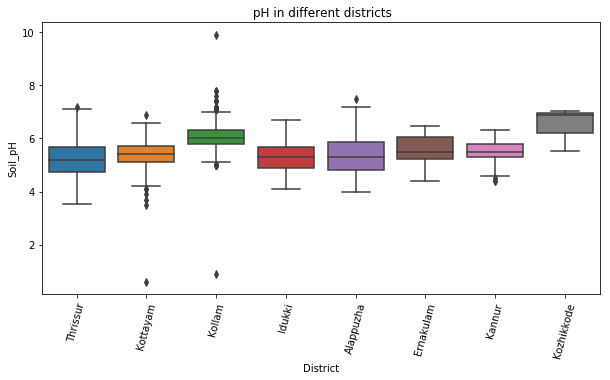

In [15]:

plt.figure(figsize=(10,5))
sns.boxplot(x='District',y='Soil_pH',data=df)
plt.title(" pH in different districts")
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

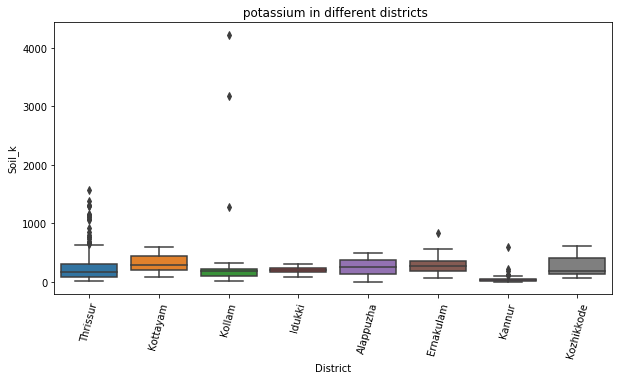

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='District',y='Soil_k',data=df)
plt.title(" potassium in different districts")
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

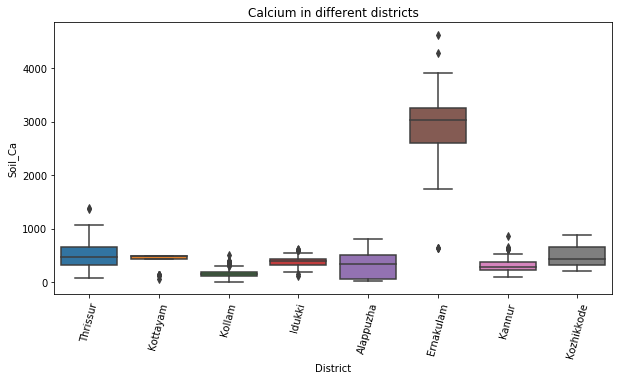

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='District',y='Soil_Ca',data=df)
plt.title("Calcium in different districts")
plt.xticks(rotation=75)

Text(0.5, 1.0, 'Mangnese distribution')

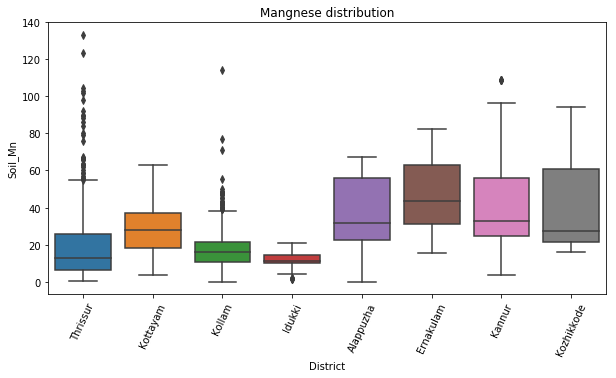

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='District',y='Soil_Mn',data=df)
plt.xticks(rotation=65)
plt.title('Mangnese distribution')

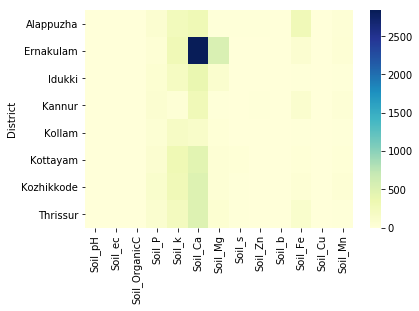

In [24]:

sns.heatmap(mean,cmap="YlGnBu")

In [25]:
mean=df.groupby('District')[soil_col].mean()

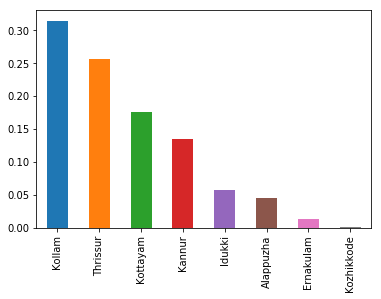

In [26]:
df['District'].value_counts(normalize=True).plot(kind='Bar')

In [27]:

from scipy import stats

In [28]:
district_ph=df[['District','Soil_pH']]

In [29]:
district_ph.head()

,District,Soil_pH
0,Thrissur,6.7
1,Kottayam,4.3
2,Kollam,6.1
3,Kottayam,4.4
4,Thrissur,6.3


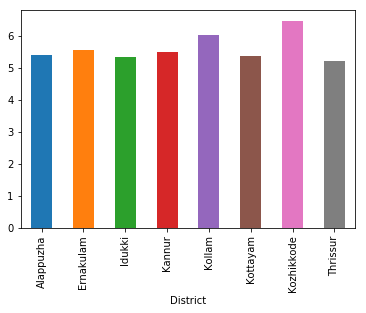

In [30]:
district_ph.groupby('District')['Soil_pH'].mean().plot(kind='bar')

In [31]:
group_ph=district_ph.groupby('District')

In [32]:

group_ph

In [33]:

group_ph.groups['Alappuzha']

Int64Index([ 108,  109,  115,  119,  273,  274,  275,  276,  278,  279,  306,
             307,  338,  341,  344,  346,  347,  468,  469,  470,  471,  472,
             473,  474,  475,  476,  477,  478, 1183, 1185, 1277, 1292, 1297,
            1303, 1308, 1314, 1328, 1338, 1339, 1346, 1350, 1356, 1359, 1360,
            1365, 1373, 1376, 1421, 1422, 1428, 1430, 1434, 1437, 1440, 1441,
            1463, 1464, 1466, 1467, 1665, 1666, 1667, 1670, 1674, 1679, 1682,
            1686, 1691, 1692, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701,
            1702, 1703, 1704, 1705, 1706, 1707, 1708, 1710, 1714, 1715, 1717,
            1718, 1803, 1806],
           dtype='int64')

In [34]:
group_ph.groups['Thrissur']

Int64Index([   0,    4,    6,    9,   10,   11,   13,   15,   18,   23,
            ...
            1958, 1970, 1971, 1972, 1975, 1979, 1984, 1988, 1992, 1998],
           dtype='int64', length=513)

In [35]:
#one way anova
stats.f_oneway(group_ph.groups['Alappuzha'],
               group_ph.groups['Ernakulam'],
               group_ph.groups['Idukki'],
              group_ph.groups['Kannur'],group_ph.groups['Kollam'],group_ph.groups['Kottayam'],
             group_ph.groups['Kozhikkode'],group_ph.groups['Thrissur'])

F_onewayResult(statistic=114.13127661362887, pvalue=5.604370845690677e-141)

In [36]:
#as p value<0.05 we can reject null hypothesis which says ph in all district is same.


In [38]:

district_ca=df[['District','Soil_Ca']]

In [40]:
district_ca.head()

,District,Soil_Ca
0,Thrissur,913.8
1,Kottayam,131.1
2,Kollam,321.2
3,Kottayam,131.1
4,Thrissur,814.8


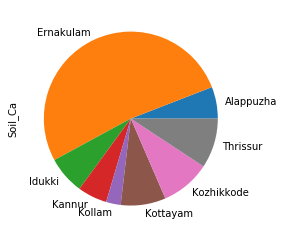

In [41]:
district_ca.groupby('District')['Soil_Ca'].mean().plot(kind='pie')

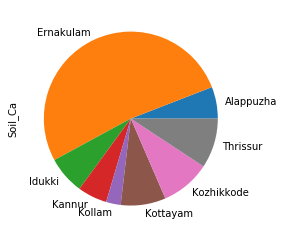

In [42]:
district_ca.groupby('District')['Soil_Ca'].mean().plot(kind='pie')

In [44]:

group_ca=district_ca.groupby('District')

In [45]:
stats.f_oneway(group_ca.groups['Alappuzha'],
               group_ca.groups['Ernakulam'],
               group_ca.groups['Idukki'],
              group_ca.groups['Kannur'],group_ca.groups['Kollam'],group_ca.groups['Kottayam'],
             group_ca.groups['Kozhikkode'],group_ca.groups['Thrissur'])

F_onewayResult(statistic=114.13127661362887, pvalue=5.604370845690677e-141)

In [46]:
#as p value<0.05 we can reject null hypothesis which says calcium content in all district is same.

In [47]:
#MULTIPLE COMPARISONS USING TUKEY HSD

In [48]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

In [49]:
Multi_ph = MultiComparison(district_ph['Soil_pH'],district_ph['District'])

In [50]:
Multi_ca = MultiComparison(district_ca['Soil_Ca'],district_ca['District'])


In [52]:
print(Multi_ca.tukeyhsd().summary())

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
  group1     group2    meandiff    lower      upper    reject
-------------------------------------------------------------
Alappuzha  Ernakulam  2515.4541  2390.4295  2640.4787   True 
Alappuzha    Idukki    61.7018    -19.6234   143.0271  False 
Alappuzha    Kannur    -22.5474   -92.6397   47.5449   False 
Alappuzha    Kollam   -173.2006  -238.0853   -108.316   True 
Alappuzha   Kottayam   134.6811   66.6263    202.7358   True 
Alappuzha  Kozhikkode  182.3886  -157.0836   521.8608  False 
Alappuzha   Thrissur   183.9228   118.1175   249.728    True 
Ernakulam    Idukki   -2453.7523 -2575.7733 -2331.7314  True 
Ernakulam    Kannur   -2538.0015 -2652.8416 -2423.1614  True 
Ernakulam    Kollam   -2688.6548 -2800.3925 -2576.917   True 
Ernakulam   Kottayam  -2380.773  -2494.381  -2267.1651  True 
Ernakulam  Kozhikkode -2333.0655 -2684.5149 -1981.6161  True 
Ernakulam   Thrissur  -2331.5314 -2443.8062 -2219.2565  True 
  Idukki

In [53]:
print(Multi_ph.tukeyhsd().summary())

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
Alappuzha  Ernakulam   0.1643  -0.2174  0.5459 False 
Alappuzha    Idukki   -0.0714  -0.3197  0.1768 False 
Alappuzha    Kannur    0.1027  -0.1113  0.3167 False 
Alappuzha    Kollam    0.6383   0.4402  0.8363  True 
Alappuzha   Kottayam  -0.0386  -0.2464  0.1691 False 
Alappuzha  Kozhikkode  1.0679   0.0316  2.1042  True 
Alappuzha   Thrissur  -0.1919  -0.3928  0.009  False 
Ernakulam    Idukki   -0.2357  -0.6082  0.1368 False 
Ernakulam    Kannur   -0.0616  -0.4121  0.289  False 
Ernakulam    Kollam    0.474    0.1329  0.8151  True 
Ernakulam   Kottayam  -0.2029  -0.5497  0.1439 False 
Ernakulam  Kozhikkode  0.9037  -0.1692  1.9766 False 
Ernakulam   Thrissur  -0.3561  -0.6989 -0.0134  True 
  Idukki     Kannur    0.1741   -0.023  0.3713 False 
  Idukki     Kollam    0.7097   0.5299  0.8895  True 
  Idukki    Kottayam   0.032